<h1><center>Exploratory Data Exploration of the GHDx Dataset</center></h1>
<h2><center>Zak Zheng</center></h2>

In this project, we aim to gain understanding of how certain food cultures influence the overall health of a person. We will be taking a look at countries with unique food cultures and seeing how the differences influence a human being based on several health metrics. (Life Expectancy, Rate of Disease Infection, Infant Mortality Rates, etc.)  


I obtained our dataset from GHDx, the URL for this particular dataset is 
http://ghdx.healthdata.org/gbd-results-tool/result/222c99dbd6d88a9661e40a1384c1c404

The column glossary can be found on
http://www.healthdata.org/terms-defined

We downloaded our dataset with following options:

GHDx dataset

Context: Risk

Location: 8 regions
Global and 

Causes:
N/A

Risk: 20 in total
16 dietary factors  
Alcohol use  
Iron deficiency  
Vitamin A deficiency  
Zinc deficiency  

Age: All

Sex: All

Year: 1990, 1995, 2000, 2005, 2010, 2015
Measure: Death

Metric: Percent

Data download address:
http://ghdx.healthdata.org/gbd-results-tool/result/222c99dbd6d88a9661e40a1384c1c404

If you want to know what a term/column means
http://www.healthdata.org/terms-defined
Sike this doesnt define them all 


Note: There are many causes of deaths that are definitely not relevant to diet, i.e., HIV/AIDS, animal contact, injuries etc. But there are many equally causes that might be related to diet, we have picked 20 risk factors but there are many other ones such as intestinal nematode infectoins, wrinary diseases and male intertility, gynecological diseases that we did not include. The choice of risks is somewhat ad hoc but we believe it is sufficently reliable.

Another note: I changed my dataset as I was working through our first agreed version, so I have a slightly different one than others'. There are many factors missing in the data, this data is the same as we will see towards the end and so I have decided to expand it a bit by including more age groups and  number of years.

## Set up

In [6]:
# Import libraries
%matplotlib inline
#import matplotlib
#import plotly.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import seaborn as sns

# Read in data
import pandas as pd
data = pd.read_csv('~/Documents/GitHub/info370-finalproject/final.csv')
#import the module so that we can tables when printing dataframes
from IPython.display import display, HTML

## Data Structure
Get a general sense of the total dataset.

In [16]:
df = pd.DataFrame(data)
print 'The size of the data is:', df.size
print 
print 'The List of varaibles are:' , list(data)
print
print 'The data types are:',df.dtypes

df.describe()

The size of the data is: 16416

The List of varaibles are: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'rei_id', 'rei_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']

The data types are: measure_id         int64
measure_name      object
location_id        int64
location_name     object
sex_id             int64
sex_name          object
age_id             int64
age_name          object
cause_id           int64
cause_name        object
rei_id             int64
rei_name          object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


,measure_id,location_id,sex_id,age_id,cause_id,rei_id,metric_id,year,val,upper,lower
count,912.0,912.000000,912.0,912.0,912.0,912.000000,912.0,912.000000,9.120000e+02,9.120000e+02,9.120000e+02
mean,1.0,5761.000000,3.0,22.0,294.0,113.684211,2.0,2002.500000,1.889259e-02,2.777492e-02,1.138749e-02
std,0.0,14702.398499,0.0,0.0,0.0,9.284682,0.0,8.543811,2.218380e-02,3.169489e-02,1.512262e-02
min,1.0,1.000000,3.0,22.0,294.0,95.000000,2.0,1990.000000,3.654939e-07,6.255875e-07,5.251683e-08
25%,1.0,239.750000,3.0,22.0,294.0,111.000000,2.0,1995.000000,1.792275e-03,3.016684e-03,6.529667e-04
50%,1.0,241.500000,3.0,22.0,294.0,116.000000,2.0,2002.500000,7.844508e-03,1.343411e-02,3.216599e-03
75%,1.0,243.250000,3.0,22.0,294.0,121.000000,2.0,2010.000000,3.412732e-02,4.913435e-02,1.927490e-02
max,1.0,44638.000000,3.0,22.0,294.0,125.000000,2.0,2015.000000,1.516458e-01,2.014285e-01,1.089790e-01


## Data Preparation
### Dataset Refinement

For my part, I have chosen to analyze the data in **Latin America** in 2015. So I have cleaned the data futher and I have decided to look at the age of all population.

In [18]:
df.year.unique()

array([1990, 2010, 2000, 2005, 1995, 2015], dtype=int64)

In [8]:
#Uncomment this code to manually check and select areas
df.location_name.unique()

array(['Europe & Central Asia - WB', 'North America',
       'Latin America & Caribbean - WB', 'Sub-Saharan Africa - WB',
       'Middle East & North Africa - WB', 'South Asia - WB', 'Global',
       'East Asia & Pacific - WB'], dtype=object)

In [19]:
# Select the area, using the WB data
latin = df.loc[df['location_name'] == 'Latin America & Caribbean - WB']

latin = latin[latin.rei_name != 'Low physical activity']

# Rerun data stucture test
print 'The size of the data is:', latin.size

The size of the data is: 1944


### EDA: Univariate Analysis

In [26]:
#Uncomment this code to check the data
#latin.head()

In [27]:
# Remove dietary risks because it summarizes all different dietary risks, we cannot double count.
latin =latin.loc[latin['rei_name']!='Dietary risks']


Note that all observables in the dataset are the same beside two features, the cause of death and the type of risks.  
The first graph plots out the death rate of each observable.

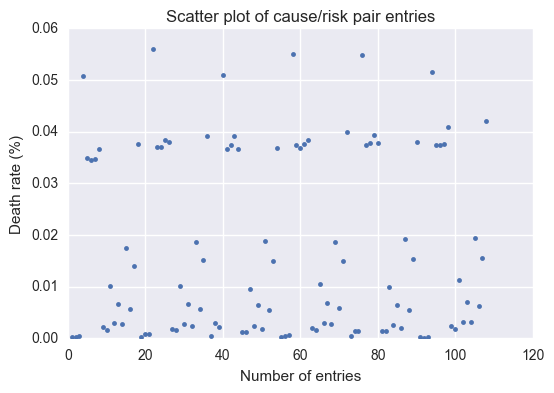

In [31]:
# create place holder
x = np.arange(1,len(latin['val']) + 1,1)
# plot the graph
plt.plot(x,latin['val'], '.')
plt.xlabel('Number of entries')
plt.ylabel('Death rate (%)')
plt.title('Scatter plot of cause/risk pair entries')

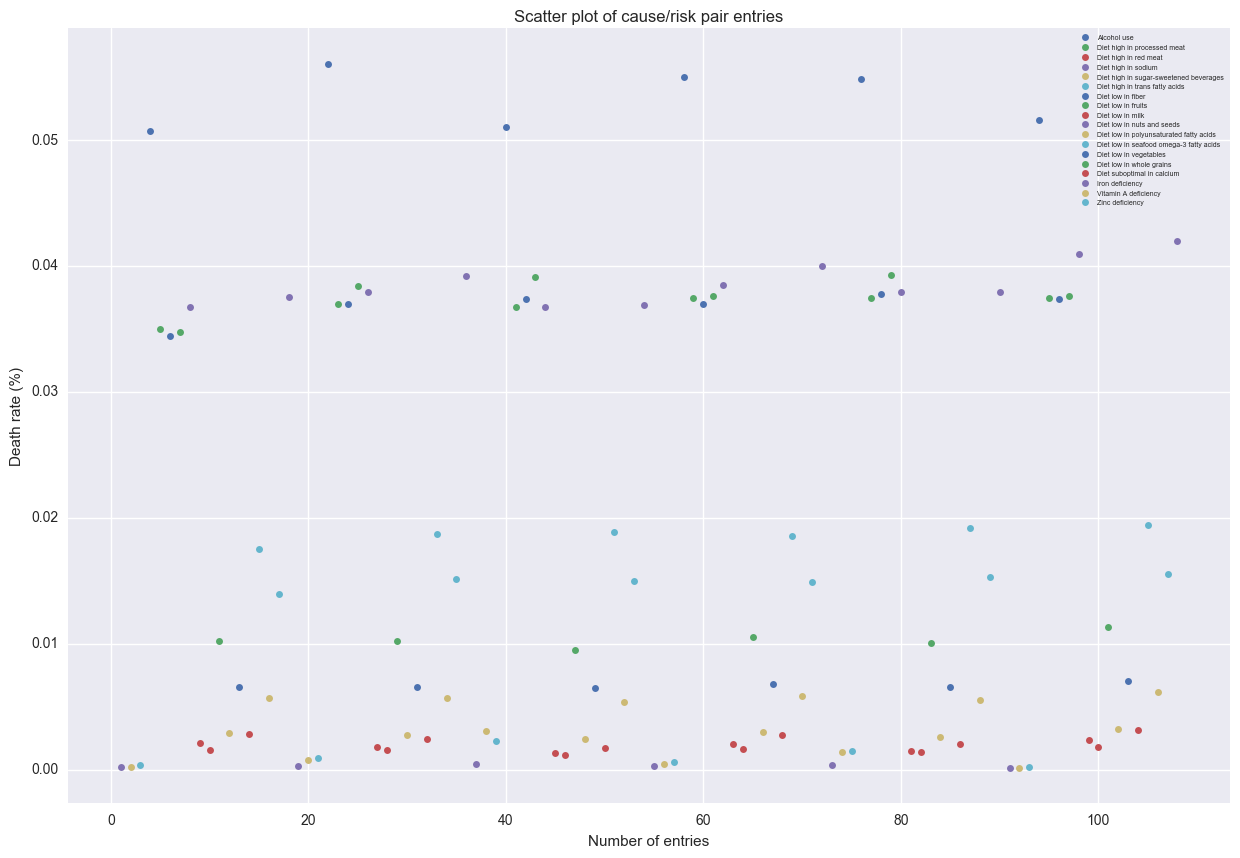

In [59]:
#place holder
x = np.arange(1,len(latin['val']) + 1,1)
y=latin['val']

labels = latin['rei_name']
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')


fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.xlabel('Number of entries')
plt.ylabel('Death rate (%)')
plt.title('Scatter plot of cause/risk pair entries')
plt.legend(loc=1,prop={'size':5})
plt.show()

Note that the second entry has a very high death rate compared to other ones. We will take a look at the cause and the risk of this particular observable.

So we conclude that iron deficiency is the risk and the biggest cause of death is iron-deficiency anemia in Latin America.

### EDA: Univariate Analysis by Category

Remember that the type of risk and the cause of death are independent, so we can have one risk contributing to different causes of death. Vice versa, one cause of death can be, and usually is due to several different risks.

So we now need to analyze the data by category. This graph is a bar chart. It shows the average death rate associated with the different types of risk.

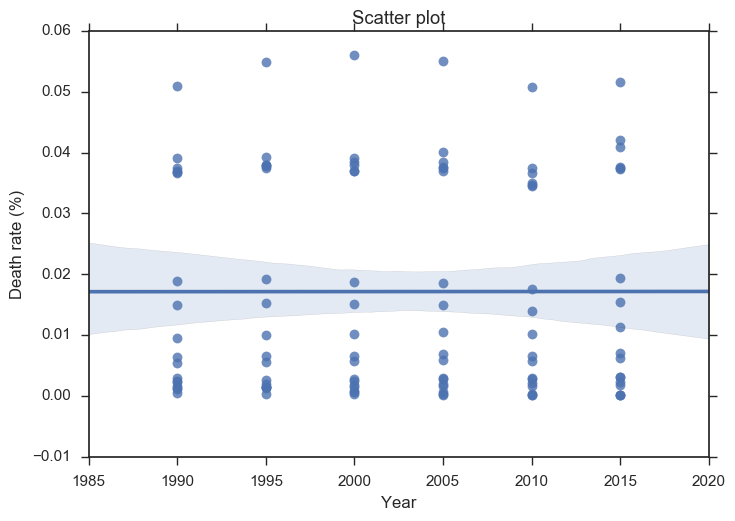

In [119]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.regplot('year', 'val',
           data=latin,
           scatter_kws={"s": 50})
plt.xlabel('Year')
plt.ylabel('Death rate (%)')
plt.title('Scatter plot')

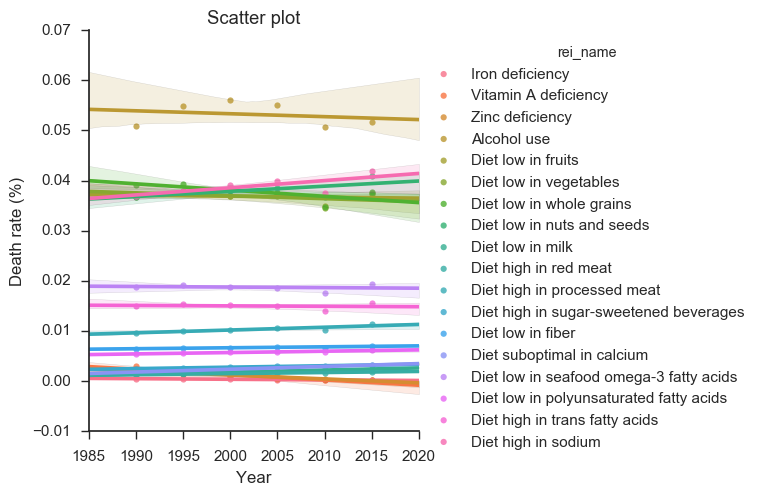

In [137]:
sns.lmplot(x="year", y="val", hue="rei_name", data=latin);

plt.xlabel('Year')
plt.ylabel('Death rate (%)')
plt.title('Scatter plot')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

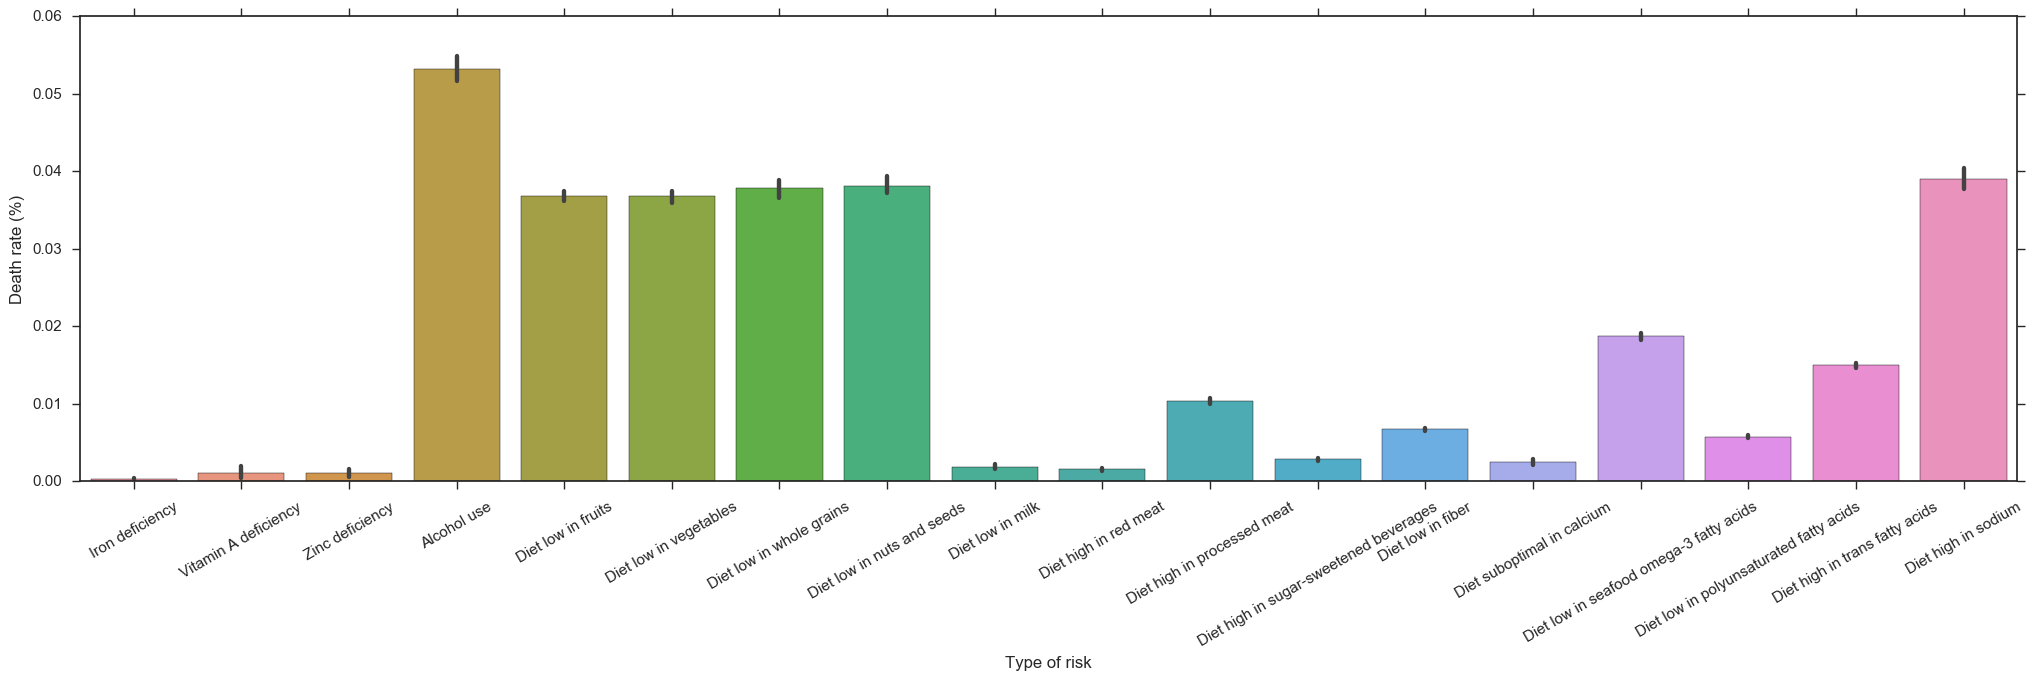

In [124]:
# Plot the bar chart
plt.figure(figsize=(25, 6))
sns.barplot('rei_name','val',data=latin)
plt.xlabel('Type of risk')
plt.ylabel('Death rate (%)')
plt.xticks(rotation=30)

The black line corresponds to the range of value. Take a look at the following section of the dataset.

In [ ]:
latin.iloc[0:2]

For these two observables, they have the same risk, iron deficiency. However, they have completely different death rates (val). This is due to the different causes.  

This natually leads us to the next graph, a bar chart that shows the average death rate corresponding to the different types of causes.

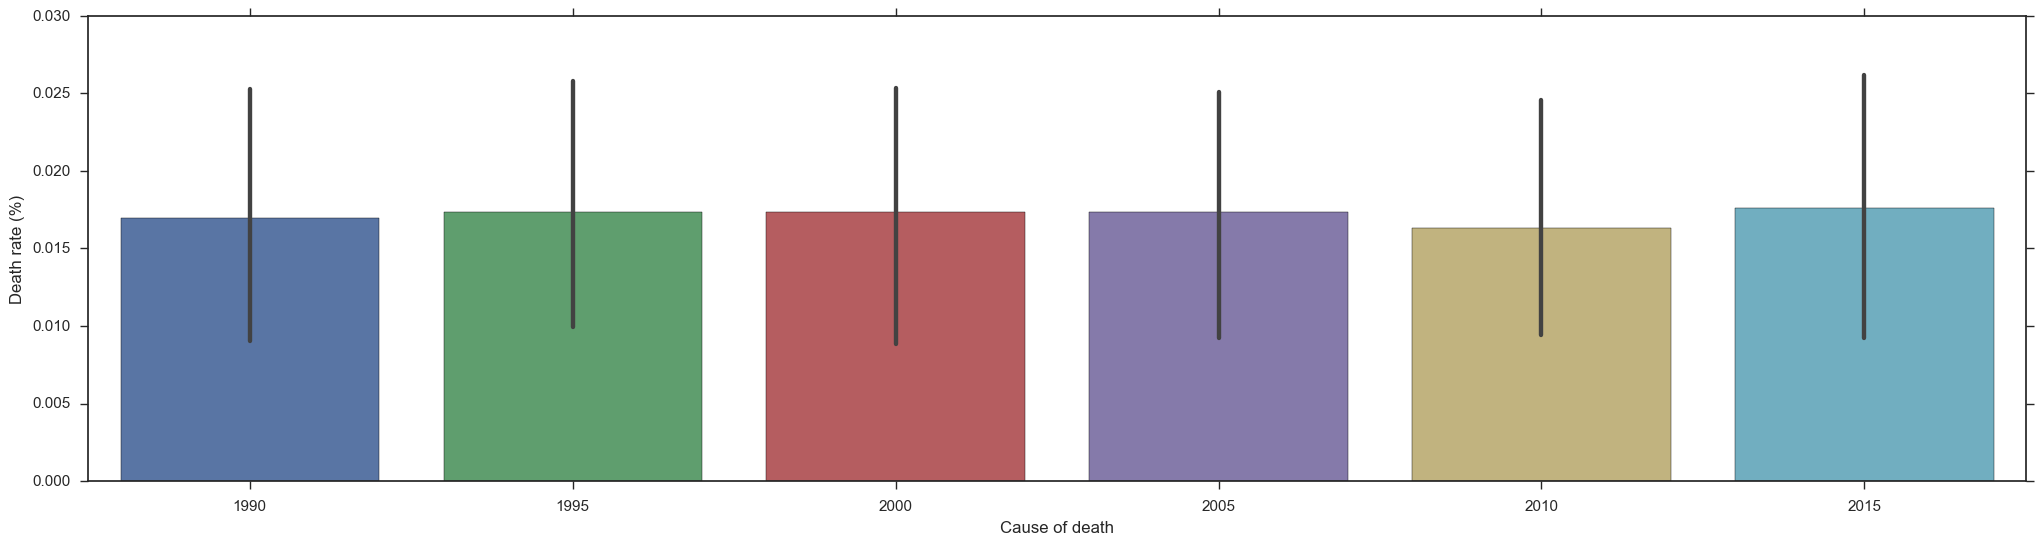

In [126]:
# Plot the bar charts
plt.figure(figsize=(25, 6))
sns.barplot('year','val',data=latin)   
plt.xlabel('Cause of death')
plt.ylabel('Death rate (%)')

### EDA: Bivariate analysis

We will analyze the correlation betweeniron deficiency as a risk and the anemica as a cause. We expect strong correlation.

In this case, we will take the global data in **all years**, i.e. 2000, 2010 and 2015. We do this becasue we want to have a bigger dataset. We assume the the relationship doesn't change in wrt time.

In [ ]:
# Select the area
globe = df.loc[df['location_name'] == 'Global']

# Only look at All ages, i.e. only use the avarage values for different age groups
globe = globe.loc[globe['age_name'] == 'All Ages']

# Remove dietary risks because it summarizes all different dietary risks, we cannot double count.
globe =globe.loc[globe['rei_name']!='Dietary risks']

# Rerun data stucture test
print 'The size of the data is:', globe.size
globe.describe()

The only possible way is to plot a 3D bar chart since we have two categorical data and we want to find out the death rate (plotted in z direction). We use the cause id and risk id. It only takes in float type.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = globe.cause_id
    ys = globe.rei_id

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=globe.val, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### This bit seems a bit flimsy. I'm not sure how we can fit a correlation on risks and causes, since they are both categorical data type. The associated id number is meaningless for the correlatoin since the id is only a place holder with no other meaning at all. 

This follwoing bar chart shows the death rate associated with different causes. Each hue corresponds to a type of risk.

In [130]:
# Plot the bar charts
plt.figure(figsize=(25, 6))
sns.barplot('cause_name','val',data=globe, hue='rei_name')   
plt.xlabel('Cause of death')
plt.ylabel('Death rate (%)')

NameError: name 'globe' is not defined

This bar chart shows the death rates associated with different risks.  Each hue corresponds to a type of cause.

In [ ]:
# Plot the bar charts
plt.figure(figsize=(25, 6))
sns.barplot('rei_name','val',data=globe, hue='cause_name')   
plt.xlabel('Cause of death')
plt.ylabel('Death rate (%)')
plt.xticks(rotation=30)
plt.show()

### Summary of Insights

First of all, alcohol use seems to reduce death rate. This is rather unexpected. However this data does not give details in the amount of alcohol consumption. I suspect it is due to a small daily consuption of red wine rather than binge drinking!  

From the second last graph, we can see that anemia is a major cause of death and it's 100% due to iron deficiency. It does make sense for it to only contain risk from iron deficiency. However, it is clear that the dataset is missing risks for nearly all causes of death. Take 'digestive deseases' for example, we only have risk data on alcohol use. We only have complete risk data on diabetes realted diseases.  

The dataset only provides detailed diet risks for diabetes is unfortunate. The only way to get around this is to completely ignore the cause of death and only analyze the effect of the diet choices (risks) on the death rate. This is what we did in the second EDA univariate by category example.  

If we take this approach, we need to change our original hypothesis and there are two options.

1. Ask how diet can affect death rates _**due to diabetes**_. We can analyze their relationships in different countries/regions, age groups, gender etc.

2. Ask how diet can affect death rates. Again we can compare their relationships in different countries/regions, age groups etc.  

This provides answer to our original hypothesis, however I think this is flawed because  there are other comfounding factors that are clearing missing. So by limiting ourselves to solve a smaller problem, that is only to find the diabetes death rate, we can be more certain about our findings.

In [ ]:
# An idea to look at two different regions for the complete analysis later

# Select two areas in Latin America
df1 = df.loc[df['location_name'] == 'Southern Latin America']
df2 = df.loc[df['location_name'] == 'Tropical Latin America']

# Merge
latins = pd.merge(df1, df2, how='outer')

# Only look at All ages, i.e. only use the avarage values for different age groups
latins = latins.loc[latins['age_name'] == 'All Ages']

# Remove dietary risks because it summarizes all different dietary risks, we cannot double count.
latins =latins.loc[latins['rei_name']!='Dietary risks']